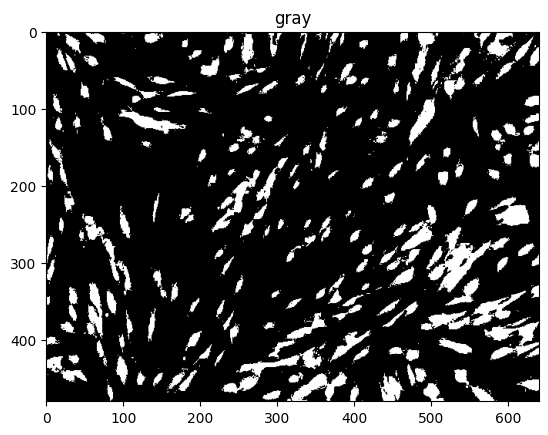

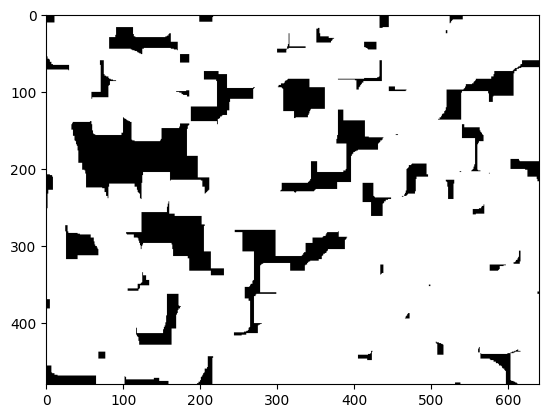

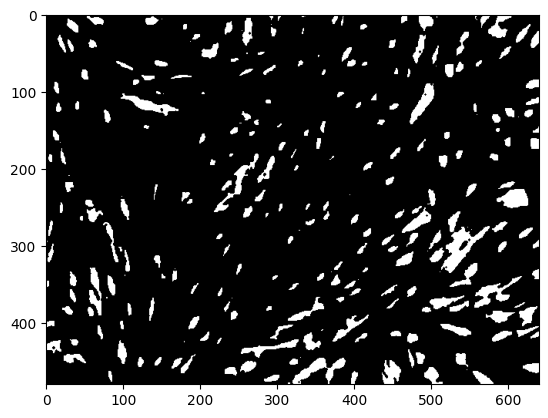

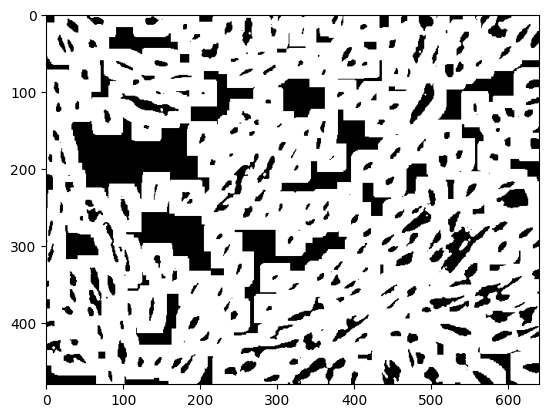

267


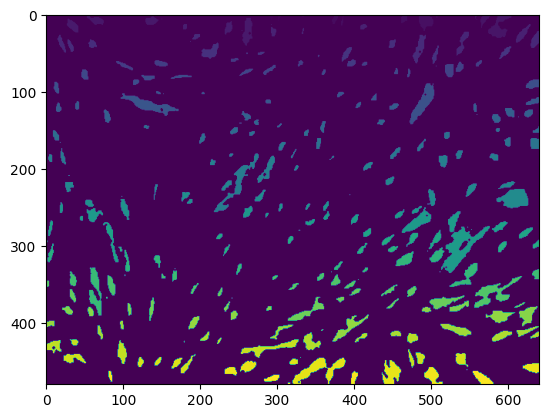

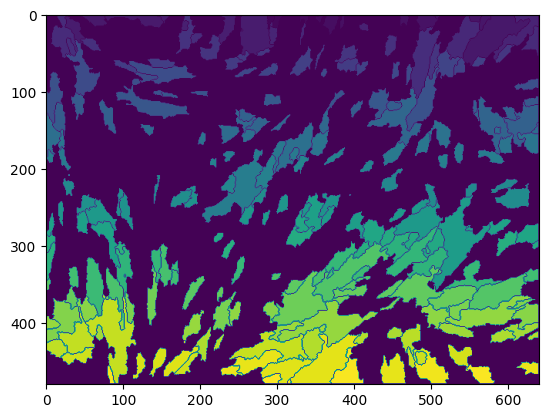

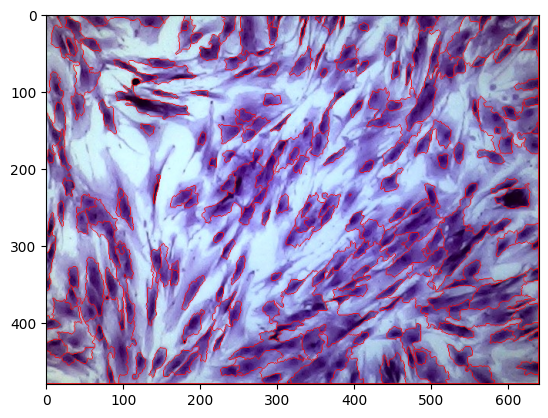

In [47]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
# Алгоритм водораздела
img = cv.imread('lots1.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)

ret, thresh = cv.threshold(gray,75,255,0)
thresh = cv.bitwise_not(thresh)
plt.imshow(cv.cvtColor(thresh,cv.COLOR_GRAY2RGB))
plt.title('gray')
plt.show()

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 1)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=15)
plt.imshow(cv.cvtColor(sure_bg,cv.COLOR_GRAY2RGB))
plt.show()
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
plt.imshow(cv.cvtColor(sure_fg,cv.COLOR_GRAY2RGB))
plt.show()
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(cv.cvtColor(unknown,cv.COLOR_GRAY2RGB))
plt.show()

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
print(ret-1)
plt.imshow(markers)
plt.show()

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(cv.cvtColor(gray,cv.COLOR_GRAY2RGB),markers)
segmented_img = np.array(img)
segmented_img[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()
plt.imshow(segmented_img)
plt.show()

77 316
316


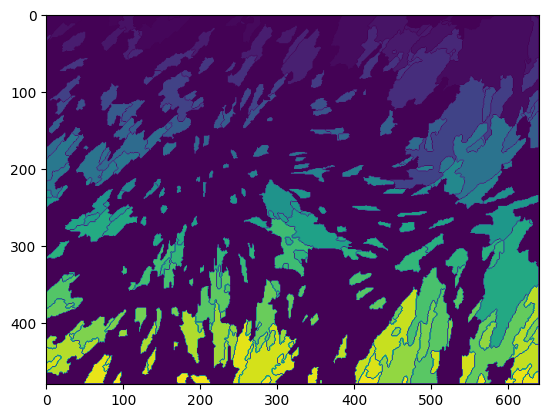

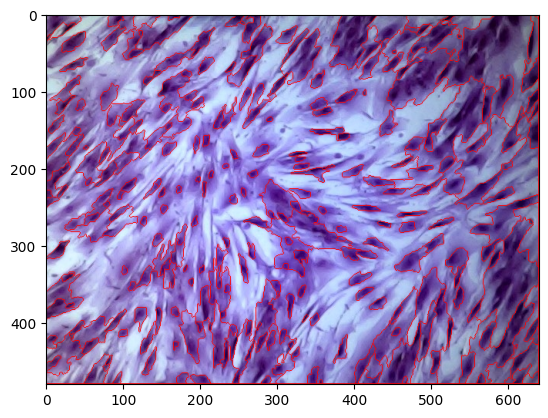

In [80]:
# Компактная версия:
# Данные
img = cv.imread('lots2.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

def max_number(img, max_lvl):
    # Получение чб
    gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    # Получение бинарного изображения
    maxl = 0
    maxn = 0
    for lvl in range(1,max_lvl+1):
        ret, thresh = cv.threshold(gray,lvl,255,0)
        thresh = cv.bitwise_not(thresh)
        # Очистка изображение от шумов
        kernel = np.ones((3,3),np.uint8)
        opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 1)
        # "Уверенный" передний план
        dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
        ret, sure_fg = cv.threshold(dist_transform,0.1*dist_transform.max(),255,0)
        sure_fg = np.uint8(sure_fg)
        number, markers = cv.connectedComponents(sure_fg)
        number = number - 1
        if(number> maxn):
            maxn = number
            maxl = lvl
    return maxl, maxn

lvl, gbg = max_number(img, 110)

# Получение чб
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
# Получение бинарного изображения
ret, thresh = cv.threshold(gray,lvl,255,0)
thresh = cv.bitwise_not(thresh)
# Очистка изображение от шумов
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 1)
# "Уверенный" задний план
sure_bg = cv.dilate(opening,kernel,iterations=15)
# "Уверенный" передний план
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.1*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
# Серая зона
unknown = cv.subtract(sure_bg,sure_fg)
# Определение количества объектов и маркеров
number, markers = cv.connectedComponents(sure_fg)
number = number - 1
print(str(lvl)+" "+str(number))
markers = markers+1
markers[unknown==255] = 0
    
# Cегментация
markers = cv.watershed(cv.cvtColor(gray,cv.COLOR_GRAY2RGB),markers)
segmented_img = np.array(img)
segmented_img[markers == -1] = [255,0,0]

print(number)
plt.imshow(markers)
plt.show()
plt.imshow(segmented_img)
plt.show()